In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

/Users/karolstudniarek/miniconda3/envs/tensorflow/lib/python3.10/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


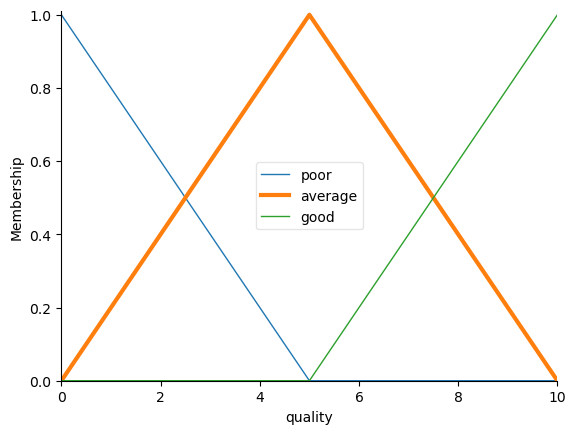

In [6]:
# You can see how these look with .view()
quality['average'].view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

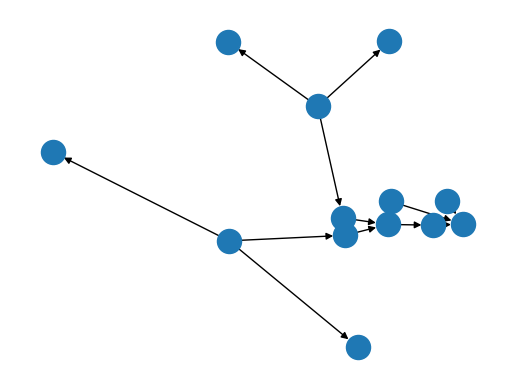

In [7]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

In [8]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

19.847607361963195


/Users/karolstudniarek/miniconda3/envs/tensorflow/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


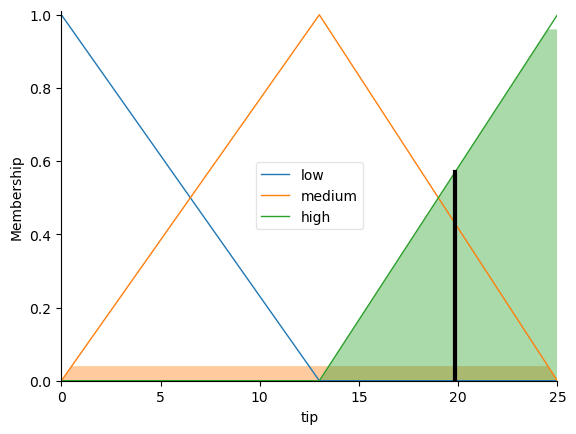

In [10]:
print(tipping.output['tip'])
tip.view(sim=tipping)

In [7]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(points=[[0., 1.],  [5., 0.]], term="poor")
S_2 = FuzzySet(points=[[0., 0.], [5., 1.], [10., 0.]], term="good")
S_3 = FuzzySet(points=[[5., 0.],  [10., 1.]], term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality"))

F_1 = FuzzySet(points=[[0., 1.],  [10., 0.]], term="rancid")
F_2 = FuzzySet(points=[[0., 0.],  [10., 1.]], term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality"))

# Define output crisp values
FS.set_crisp_output_value("small", 5)
FS.set_crisp_output_value("average", 15)

# Define function for generous tip (food score + service score + 5%)
FS.set_output_function("generous", "Food+Service+5")

# Define fuzzy rules
R1 = "IF (Service IS poor) OR (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])

# Set antecedents values
FS.set_variable("Service", 3)
FS.set_variable("Food", 8)

# Perform Sugeno inference and print output
print(FS.Sugeno_inference(["Tip"]))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type
{'Tip': 13.222222222222225}


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Pobranie informacji o zmiennej lingwistycznej "Service"
ling_var_service = FS.
ling_var_name = ling_var_service.concept
ling_var_sets = ling_var_service.terms

# Tworzenie danych do wykresu
x_values = np.linspace(ling_var_service.min_range, ling_var_service.max_range, 100)
y_values = []
for term in ling_var_sets:
    y_values.append([term.membership(x) for x in x_values])

# Wygenerowanie wykresu
plt.figure(figsize=(8, 6))
for i, term in enumerate(ling_var_sets):
    plt.plot(x_values, y_values[i], label=term.term)
plt.xlabel(ling_var_name)
plt.ylabel("Przynależność")
plt.title(f"Zmienna lingwistyczna: {ling_var_name}")
plt.legend()
plt.grid(True)

# Wyświetlenie wykresu
plt.show()

AttributeError: 'FuzzySystem' object has no attribute 'get_linguistic_variable'